In [3]:
pip install vaderSentiment

import necessary Python libraries for data handling, visualization, and sentiment/topic analysis.

In [5]:
import pandas as pd
import os
# tokenizatio, Lemmatization, and stopword removal
import spacy
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
#Sentiment Analysis
import vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

#Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from IPython.display import display

#Topic Modeling
from nltk.tokenize import TreebankWordTokenizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


This section loads multiple CSV files and merges them into a single DataFrame for analysis.

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# reading all the csv files & concatnating all Dataframes into a single DataFrame
csv_directory = "/content/drive/MyDrive/datasets"
output_csv_name = "merged_data.csv"

csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]
movies_df = []

for file in csv_files:
    file_path = os.path.join(csv_directory, file)
    try:
        df = pd.read_csv(file_path)
        movies_df.append(df)
        #print
    except:
        print(f"Error loading {file}: {e}. skipping")

combine_df = pd.concat(movies_df, ignore_index = True)


All CSV files are read and concatenated into a single DataFrame, combine_df which will be used for text processing and analysis.

# **Data Cleaning**

**Data Inspection**

In [31]:
print("Combined DataFrame Information:")
combine_df.info()

Combined DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22334 entries, 0 to 22333
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie                22334 non-null  object 
 1   chapter              22334 non-null  object 
 2   character            22334 non-null  object 
 3   dialog               22332 non-null  object 
 4   Unnamed: 0           14889 non-null  float64
 5   gender               14889 non-null  object 
 6   releaseYear          14889 non-null  float64
 7   processed_tokens     7444 non-null   object 
 8   processed_text       7230 non-null   object 
 9   preprocessed_tokens  7444 non-null   object 
 10  preprocessed_text    7230 non-null   object 
dtypes: float64(2), object(9)
memory usage: 1.9+ MB


In [32]:
combine_df.head(20)

,movie,chapter,character,dialog,Unnamed: 0,gender,releaseYear,processed_tokens,processed_text,preprocessed_tokens,preprocessed_text
0,Harry Potter and the Half-Blood Prince,Snape's Visitors,Bellatrix Lestrange,Narcissa!,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Harry Potter and the Half-Blood Prince,Snape's Visitors,Bellatrix Lestrange,Cissy! You mustn't do this. He can't be trusted.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Half-Blood Prince,Snape's Visitors,Narcissa Malfoy,The Dark Lord trusts him.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Harry Potter and the Half-Blood Prince,Snape's Visitors,Bellatrix Lestrange,The Dark Lord is mistaken.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Harry Potter and the Half-Blood Prince,Snape's Visitors,Bellatrix Lestrange,Or so I believe.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Harry Potter and the Half-Blood Prince,Snape's Visitors,Narcissa Malfoy,"Well, who can one trust these days?",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Harry Potter and the Half-Blood Prince,Snape's Visitors,Bellatrix Lestrange,He lives in this Muggle dunghill?,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Harry Potter and the Half-Blood Prince,Snape's Visitors,Severus Snape,"Run along, Wormtail.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Harry Potter and the Half-Blood Prince,Snape's Visitors,Narcissa Malfoy,"I've nowhere else to turn, Severus.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Harry Potter and the Half-Blood Prince,Snape's Visitors,Bellatrix Lestrange,You must be joking.,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
print("\nList of Columns in the DataFrame:")
print(combine_df.columns.tolist())


List of Columns in the DataFrame:
['movie', 'chapter', 'character', 'dialog', 'Unnamed: 0', 'gender', 'releaseYear', 'processed_tokens', 'processed_text', 'preprocessed_tokens', 'preprocessed_text']


**Data Standardization and Augmentation**

In [34]:
combine_df["character"] = combine_df["character"].str.strip().str.lower()
combine_df["movie"] = combine_df["movie"].replace("Harry Potter and the Gobelt of Fire", "Harry Potter and the Goblet of Fire")

In [35]:
hp_movies = {
    "Harry Potter and the Philosopher's Stone": 2001,
    "Harry Potter and the Chamber of Secrets": 2002,
    "Harry Potter and the Prisoner of Azkaban": 2004,
    "Harry Potter and the Goblet of Fire": 2005,
    "Harry Potter and the Order of the Phoenix": 2007,
    "Harry Potter and the Half-Blood Prince": 2009,
    "Harry Potter and the Deathly Hallows Part 1": 2010,
    "Harry Potter and the Deathly Hallows Part 2": 2011,
}
characters_gender = {
    'bellatrix lestrange': 'female',
    'narcissa malfoy': 'female',
    'severus snape': 'male',
    'waitress': 'female',
    'harry potter': 'male',
    'albus dumbledore': 'male',
    'horace horace slughorn': 'male',
    'horace slughorn': 'male',
    'ginny weasley': 'female',
    'molly weasley': 'female',
    'ron weasley': 'male',
    'hermione granger': 'female',
    'fred weasley': 'male',
    'george weasley': 'male',
    'lavender brown': 'female',
    'luna lovegood': 'female',
    'draco malfoy': 'male',
    'blaise zabini': 'male',
    'pansy parkinson': 'female',
    'filius flitwick': 'male',
    'argus filch': 'male',
    'minerva mcgonagall': 'female',
    'katie bell': 'female',
    'mrs. cole': 'female',
    'tom riddle': 'male',
    'cormac mclaggen': 'male',
    'rubeus hagrid': 'male',
    'skinny kid': 'unknown',
    'leanne': 'female',
    'neville longbottom': 'male',
    'marcus belby': 'male',
    'seamus finnigan': 'male',
    'dean thomas': 'male',
    'students': 'mixed/unknown',
    'eldred worple': 'male',
    'waiter': 'male',
    'remus lupin': 'male',
    'nymphadora tonks': 'female',
    'arthur weasley': 'male',
    'fenrir greyback': 'male',
    'rufus scrimgeour': 'male',
    'mrs. granger': 'female',
    'mr. granger': 'male',
    'voldemort': 'male',
    'lucius malfoy': 'male',
    'corban yaxley': 'male',
    'death eater': 'mixed/unknown',
    'pius thicknesse': 'male',
    'peter pettigrew': 'male',
    'charity burbage': 'female',
    'vernon dursley': 'male',
    'petunia dursley': 'female',
    'dudley dursley': 'male',
    'alastor moody': 'male',
    'kingsley shacklebolt': 'male',
    'bill weasley': 'male',
    'fleur delacour': 'female',
    'mundungus fletcher': 'male',
    'garrick ollivander': 'male',
    'voldemont': 'male',
    'xenophilius lovegood': 'male',
    'elphias doge': 'male',
    'woman': 'female',
    'muriel': 'female',
    'patronus': 'varies/spirit',
    'lily potter': 'female',
    'kreacher': 'male',
    'dobby': 'male',
    'wizard': 'male',
    'dolores umbridge': 'female',
    'percy weasley': 'male',
    'witch': 'female',
    'wakanda': 'not a character',
    'man': 'male',
    'mykew gregorovitch': 'male',
    'scabior': 'male',
    'bathilda bagshot': 'female',
    'gellert grindelwald': 'male',
    'snatcher': 'mixed/unknown',
    'griphook': 'male',
    'gang thug': 'unknown',
    'arabella figg': 'female',
    'lily potter': 'female',
    'walburga black': 'female',
    'sirius black': 'male',
    'perkins': 'male',
    'cornelius fudge': 'male',
    'susan bones': 'female',
    'angelina johnson': 'female',
    'sybill trelawney': 'female',
    'zacharias smith': 'male',
    'justin finch-fletchley': 'male',
    'michael corner': 'male',
    'lee jordan': 'male',
    'lavander brown': 'female',
    'cho chang': 'female',
    'ernest macmillan': 'male',
    'rolanda hooch': 'female',
    'everard': 'male',
    'dilys derwent': 'female',
    'phineas': 'male',
    'grawp': 'male',
    'bane': 'male',
    'james potter': 'male',
    'griselda marchbanks': 'female',
    'magorian': 'male',
    'centaur': 'mixed/unknown',
    'nearly headless nick': 'male',
    'old man': 'male',
    'bartemius crouch junior': 'male',
    'amos diggory': 'male',
    'cedric diggory': 'male',
    'announcer': 'unknown',
    'bartemius crouch': 'male',
    'trolley witch': 'female',
    'student': 'unknown',
    'igor karkaroff': 'male',
    'olympe maxime': 'female',
    'rita skeeter': 'female',
    'viktor krum': 'male',
    'nigel wolpert': 'male',
    'parvati patil': 'female',
    'padma patil': 'female',
    'voldermort': 'male',
    'moaning myrtle': 'female',
    'merpeople': 'mixed/unknown',
    'snake': 'unknown',
    'tom': 'male',
    'quirinus quirrell': 'male',
    'boy': 'male',
    'goblin': 'mixed/unknown',
    'guard': 'unknown',
    'sorting hat': 'none',
    'bloody baron': 'male',
    'girl': 'female',
    'man in a painting': 'male',
    'the fat lady': 'female',
    'class': 'mixed/unknown',
    'boy 2': 'male',
    'all': 'mixed/unknown',
    'oliver wood': 'male',
    'gryffindors': 'mixed/unknown',
    'marcus flint': 'male',
    'crowd': 'mixed/unknown',
    'ghosts': 'mixed/unknown',
    'firenze': 'male',
    'marge dursley': 'female',
    'stanley shunpike': 'male',
    'shrunken head': 'unknown',
    'maid': 'female',
    'other': 'unknown',
    'vincent crabbe': 'male',
    'rosmerta': 'female',
    'ghost': 'mixed/unknown',
    'photographer': 'unknown',
    'gilderoy lockhart': 'male',
    'station guard': 'male',
    'whomping willow': 'none',
    'pomona sprout': 'female',
    'collin creevey': 'male',
    'howler': 'none',
    'pixie': 'unknown',
    'basilisk': 'unknown',
    'poppy pomfrey': 'female',
    'gregory goyle': 'male',
    'diary': 'none',
    'aragog': 'male',
    'bogrod': 'male',
    'aberforth dumbledore': 'male',
    'alecto carrow': 'female',
    'pansy parkinson': 'female',
    'professors': 'mixed/unknown',
    'helena ravenclaw': 'female',
    'albus potter': 'male',
    'mary cattermole': 'female'
}
# Mapping release years and gender to the dataframe
combine_df["gender"] = combine_df["character"].map(characters_gender)
combine_df["releaseYear"] = combine_df["movie"].map(hp_movies)

In [36]:
combine_df.head()

,movie,chapter,character,dialog,Unnamed: 0,gender,releaseYear,processed_tokens,processed_text,preprocessed_tokens,preprocessed_text
0,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Narcissa!,NaN,female,2009,NaN,NaN,NaN,NaN
1,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Cissy! You mustn't do this. He can't be trusted.,NaN,female,2009,NaN,NaN,NaN,NaN
2,Harry Potter and the Half-Blood Prince,Snape's Visitors,narcissa malfoy,The Dark Lord trusts him.,NaN,female,2009,NaN,NaN,NaN,NaN
3,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,The Dark Lord is mistaken.,NaN,female,2009,NaN,NaN,NaN,NaN
4,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Or so I believe.,NaN,female,2009,NaN,NaN,NaN,NaN


**Handling missin values**

In [37]:
print("\nNumber of missing values before cleaning:")
print(combine_df.isnull().sum())

combine_df.dropna(inplace=True)

print("\nNumber of missing values after cleaning:")
print(combine_df.isnull().sum())


Number of missing values before cleaning:
movie                      0
chapter                    0
character                  0
dialog                     2
Unnamed: 0              7445
gender                    13
releaseYear                0
processed_tokens       14890
processed_text         15104
preprocessed_tokens    14890
preprocessed_text      15104
dtype: int64

Number of missing values after cleaning:
movie                  0
chapter                0
character              0
dialog                 0
Unnamed: 0             0
gender                 0
releaseYear            0
processed_tokens       0
processed_text         0
preprocessed_tokens    0
preprocessed_text      0
dtype: int64


In [38]:
# Standardizin Text in "dialog" and "character" columns
def standardize_text(text):
    if pd.isna(text):
        return text
    text = str(text).lower()
    text = "".join(char for char in text if char.isalnum() or char.isspace() or char in ['!',"'"])
    return text.strip()

combine_df["dialog"] =  combine_df["dialog"].apply(standardize_text)
combine_df["character"] = combine_df["character"].apply(standardize_text)

combine_df["dialog"].head()


,dialog
7445,narcissa!
7446,cissy! you mustn't do this he can't be trusted
7447,the dark lord trusts him
7448,the dark lord is mistaken
7449,or so i believe


**Tokenization, Lemmatization, and Stopword Removal**

loading he English spaCy model to perform tokenization, lemmatization, and stopword removal.

In [39]:
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words("english"))

# modifying stopwords list
stop_words.discard("not")
additional_stopwords = ['I', 'not', 'well', 'would', "'s", 'one', 'say', 'go', 'know', 'get','see','come']
stop_words.update(additional_stopwords)

def preprocess_text_spacy(text):
    cleaned_text = re.sub(r'\s+', ' ', text).strip()

    doc =  nlp(cleaned_text.lower())
    processed_tokens = []

    for token in doc:
        lemma = token.lemma_

        if lemma and lemma.strip() and lemma not in stop_words:
            processed_tokens.append(lemma)
    return processed_tokens
# Applying preprocessing function
combine_df["preprocessed_tokens"] = combine_df["dialog"].apply(preprocess_text_spacy)
combine_df["preprocessed_text"] = combine_df["preprocessed_tokens"].apply(lambda x : " ".join(x))

print(combine_df["preprocessed_text"].head(10))


7445                   narcissa !
7446           cissy ! must trust
7447              dark lord trust
7448           dark lord mistaken
7449                      believe
7450                    trust day
7451         live muggle dunghill
7452           run along wormtail
7453    nowhere else turn severus
7454                    must joke
Name: preprocessed_text, dtype: object


In [40]:
# removing duplicate dialogues by cosidering the cobination of "character" and "preprocessed_text"
combine_df = combine_df.drop_duplicates(subset=['character', 'preprocessed_text'], keep='first')

In [41]:
combine_df.to_csv("merge_data.csv")

# **Exploratory Data Analysis (EDA)**

In [ ]:
print("Descriptive Statistics of Numerical Columns:")
print(combine_df.describe())

Descriptive Statistics of Numerical Columns:
       releaseYear
count  6612.000000
mean   2006.120992
std       3.406357
min    2001.000000
25%    2002.000000
50%    2007.000000
75%    2009.000000
max    2011.000000


In [ ]:
print("\nValue Counts for Categorical Columns:")
for col in ['movie', 'chapter', 'character', 'gender']:
    print(f"\nValue counts for {col}:")
    print(combine_df[col].value_counts())


Value Counts for Categorical Columns:

Value counts for movie:
movie
Harry Potter and the Order of the Phoenix      1015
Harry Potter and the Half-Blood Prince          993
Harry Potter and the Chamber of Secrets         881
Harry Potter and the Deathly Hallows Part 1     855
Harry Potter and the Philosopher's Stone        792
Harry Potter and the Prisoner of Azkaban        774
Harry Potter and the Goblet of Fire             682
Harry Potter and the Deathly Hallows Part 2     620
Name: count, dtype: int64

Value counts for chapter:
chapter
Horcruxes                      105
What Could Be Safer?            94
The Lost Prophecy               90
Perilous Potions                89
The Department of Mysteries     83
                              ... 
The Goblet of Fire               1
The Dementor's Kiss              1
Under Covers Prologue            1
Tom Riddle                       1
Writing on the wall              1
Name: count, Length: 237, dtype: int64

Value counts for character:


In [ ]:
combine_df['sentence_length'] = combine_df['preprocessed_tokens'].apply(len)
print(f"\nAverage Sentence Length: {combine_df['sentence_length'].mean()}")


Average Sentence Length: 5.293557168784029


In [ ]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6612 entries, 0 to 7444
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   movie                6612 non-null   object
 1   chapter              6612 non-null   object
 2   character            6612 non-null   object
 3   dialog               6612 non-null   object
 4   gender               6612 non-null   object
 5   releaseYear          6612 non-null   int64 
 6   preprocessed_tokens  6612 non-null   object
 7   preprocessed_text    6612 non-null   object
 8   sentence_length      6612 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 516.6+ KB


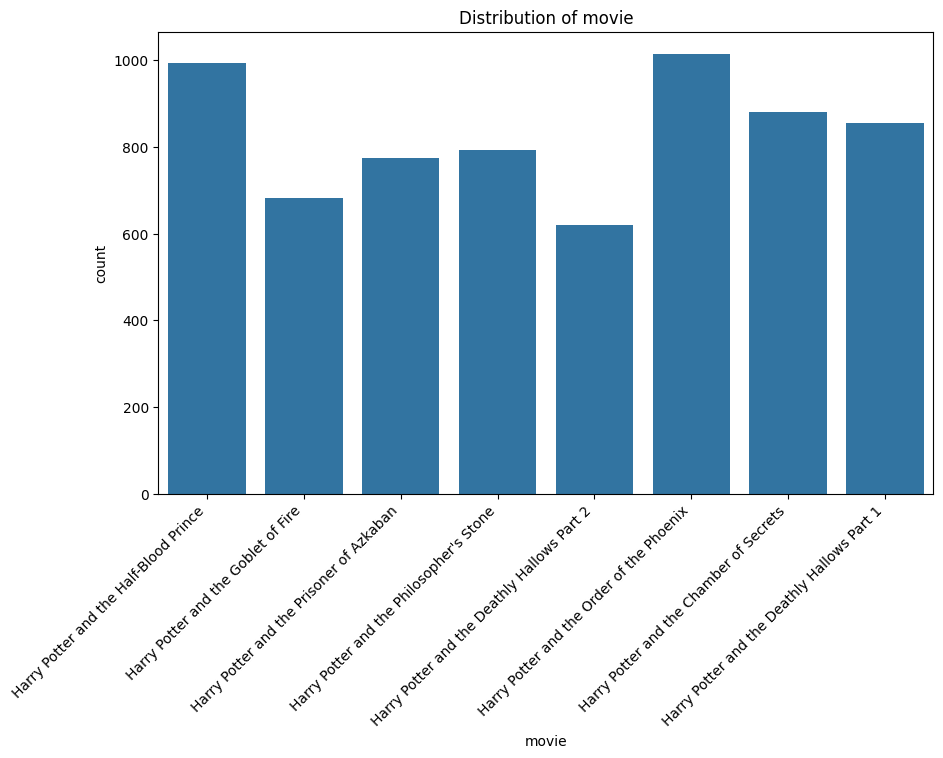

In [ ]:
# Movie title Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=combine_df, x='movie')
plt.title('Distribution of movie')
plt.xticks(rotation=45, ha='right')
plt.show()

The shows the amount of dialogue, which movie it came from.

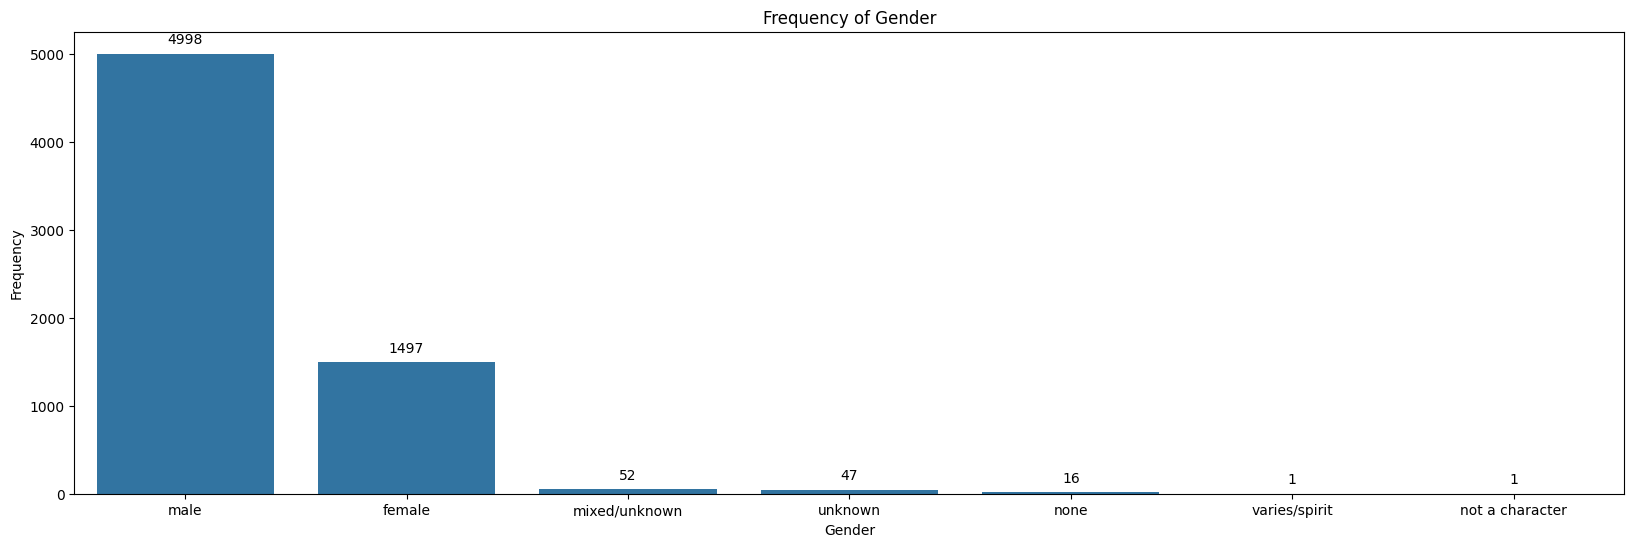

In [ ]:
gender_counts = combine_df['gender'].value_counts()

# Set figure size
plt.figure(figsize=(20, 6))

# Create the bar chart using Seaborn
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency of Gender')

# Annotate the frequency values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Frequency value
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the annotation
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()


The bar chart displays the count of instances for each gender category in a dataset.

[('!', 2304), ('harry', 658), ('think', 382), ('potter', 309), ("'", 243), ('tell', 234), ('like', 233), ('right', 222), ('oh', 220), ('take', 212), ('good', 203), ('look', 196), ('time', 181), ('dumbledore', 181), ('sir', 175), ('want', 175), ('yes', 169), ('ron', 167), ('could', 165), ('let', 165)]


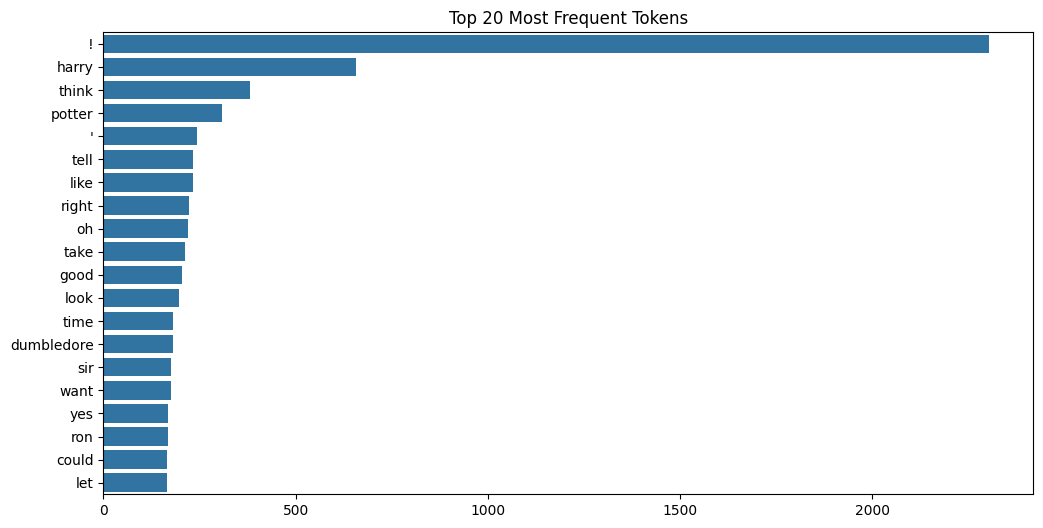

In [ ]:
# finds and plots the top 20 most frequent tokens from 'preprocessed_tokens'
all_tokens = [token for sublist in combine_df['preprocessed_tokens'] for token in sublist]
token_counts = Counter(all_tokens)
top_20_tokens = token_counts.most_common(20)
print(top_20_tokens)

tokens, counts = zip(*top_20_tokens)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(tokens))
plt.title('Top 20 Most Frequent Tokens')
plt.show()

The chart shows common tokens in the dataset,with '!' been the most frequen indicating emotional expression and words like 'think' and 'tell' suggesting opinions. This suggests the dataset has strong emotional or conversational content, useful for sentiment analysis

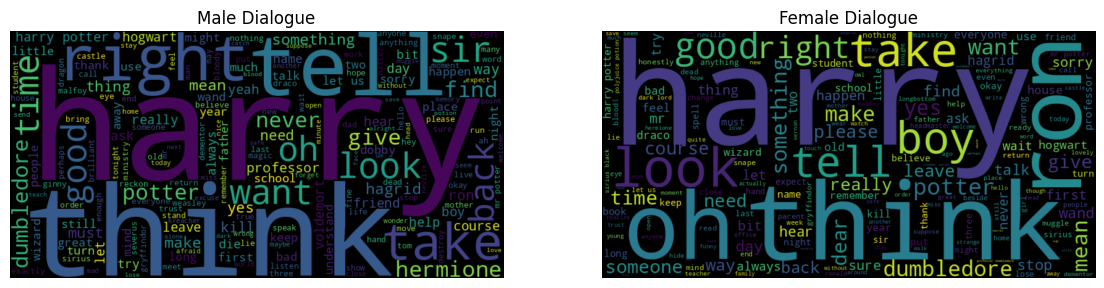

In [ ]:
# Male vs. Female Dialogue Word Clouds
male_text = " ".join(combine_df[combine_df["gender"] == "male"]["preprocessed_text"])
female_text = " ".join(combine_df[combine_df["gender"] == "female"]["preprocessed_text"])

# Generating word clouds for dialogue
wc_male = WordCloud(width = 800, height = 400).generate(male_text)
wc_female = WordCloud(width = 800, height = 400).generate(female_text)

plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
plt.imshow(wc_male, interpolation = "bilinear")
plt.axis("off")
plt.title("Male Dialogue")

plt.subplot(1, 2, 2)
plt.imshow(wc_female, interpolation="bilinear")
plt.axis("off")
plt.title("Female Dialogue")
plt.show()

Word clouds comparing male and female dialogues. Each cloud highlights the most frequently used words by each gender. These visualizations reveal differences in language patterns between genders, showing which words are most commonly used in their dialogues.

# **CLUSTERING** Analysis done by Rachna Singh

In [12]:
# === Step 1: Load the Data ===
# Read the cleaned dataset containing dialogues, character info, and preprocessed text.
df = pd.read_csv("/content/drive/MyDrive/datasets/project_data.csv")  # Replace with your actual file path

# === Step 2: Remove Empty or Null Text Entries ===
# Drop any rows where the preprocessed text is missing or just empty spaces.
df = df[df['preprocessed_text'].notnull() & (df['preprocessed_text'].str.strip() != "")]

# === Step 3: Remove Duplicate Dialogues ===
# Eliminate duplicate lines of dialogue spoken by the same character to avoid repetition bias.
df = df.drop_duplicates(subset=['character', 'preprocessed_text']).reset_index(drop=True)


In [13]:
# === Step 4: Convert Text to TF-IDF Features ===
# Transform all preprocessed dialogue into TF-IDF vectors to numerically represent text importance.
tfidf = TfidfVectorizer(max_df=0.9, min_df=5, max_features=2000)
X_tfidf = tfidf.fit_transform(df['preprocessed_text'])


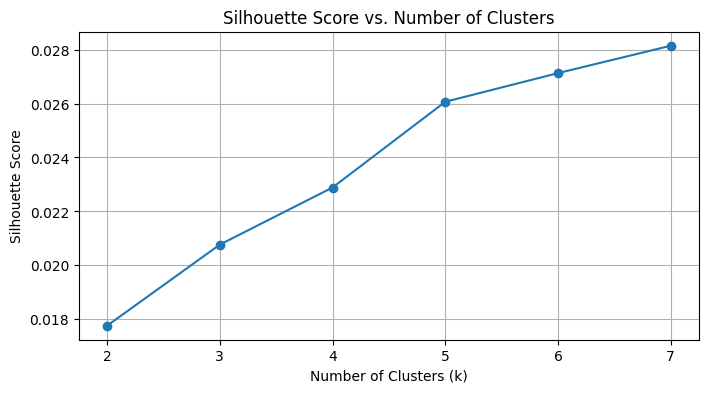

In [14]:
# === Step 5: Determine Best Number of Clusters Using Silhouette Score ===
# Try different k values and compute silhouette scores to evaluate how well-separated clusters are.
silhouette_scores = []
K = range(2, 8)  # Testing k values from 2 to 7

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_tfidf)
    score = silhouette_score(X_tfidf, model.labels_)
    silhouette_scores.append(score)

# === Step 6: Plot Silhouette Scores to Choose Best k ===
# Visualize how silhouette score varies with different cluster sizes to find the optimal one.
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


Best number of clusters (k): 7


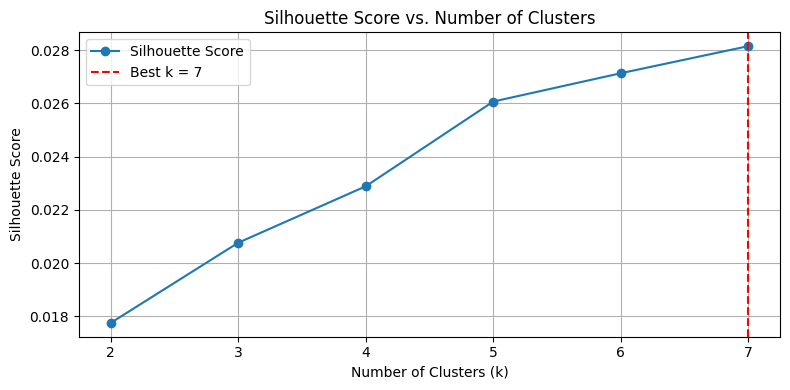

In [15]:
# === Step 7: Select Best k Value Automatically ===
# Choose the k that gives the highest silhouette score and print it for reference.
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print("Best number of clusters (k):", best_k)

#Highlight best k visually on the silhouette score plot
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, marker='o', label='Silhouette Score')
plt.axvline(best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**This plot shows that the best cluster count is k = 7, where the silhouette score peaks, indicating the most meaningful separation**

In [16]:
# === Step 8: Apply KMeans Clustering ===
# Use the selected k to cluster the TF-IDF vectors and assign cluster labels to each dialogue.
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_tfidf)


In [17]:
# === Step 9: Apply PCA for 2D Visualization ===
# Reduce the TF-IDF matrix to 2 components for visualizing how clusters separate in 2D space.
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())
df['pca_x'] = X_pca[:, 0]
df['pca_y'] = X_pca[:, 1]


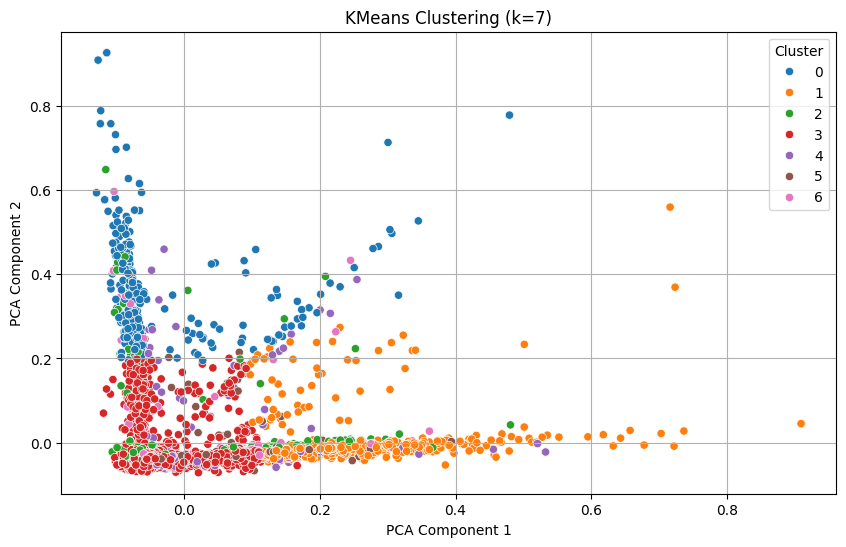

In [18]:
# === Step 10: Visualize the Clusters in 2D Plot ===
# Plot each dialogue on a 2D PCA map and color them by their assigned cluster label.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_x', y='pca_y', hue='cluster', palette='tab10')
plt.title(f"KMeans Clustering (k={best_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

**This 2D plot visualizes how dialogue lines group by theme or tone. Clusters are clearly separated, showing distinct patterns in speech.**

In [19]:
# === Step 11: Show Top Words for Each Cluster ===
# Identify and print the top 10 keywords per cluster to help interpret their content themes.
print("\nTop Keywords per Cluster:")
terms = tfidf.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(best_k):
    top_words = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}: {' | '.join(top_words)}")



Top Keywords per Cluster:
Cluster 0: harry | potter | not | see | right | get | hello | look | dobby | good
Cluster 1: not | know | see | like | well | would | say | understand | tell | get
Cluster 2: go | let | not | us | harry | get | well | back | right | want
Cluster 3: get | well | know | see | oh | one | right | sir | say | yes
Cluster 4: think | not | would | know | go | harry | one | something | really | yeah
Cluster 5: boy | kill | not | one | would | know | want | well | go | end
Cluster 6: come | back | not | get | harry | well | see | would | hurry | go


In [20]:
# === Step 12: Display Sample Dialogues from Each Cluster ===
# For interpretation, show five example lines from each cluster with character, gender, and movie.
for i in range(best_k):
    print(f"\nCluster {i} Sample Dialogues:\n" + "-"*40)
    display(df[df['cluster'] == i][['dialog', 'character', 'gender', 'movie']].head(5))



Cluster 0 Sample Dialogues:
----------------------------------------


,dialog,character,gender,movie
31,harry potter who's harry potter,waitress,female,Harry Potter and the Half-Blood Prince
46,wand out harry,albus dumbledore,male,Harry Potter and the Half-Blood Prince
89,now you're joking i was only wondering when h...,ginny weasley,female,Harry Potter and the Half-Blood Prince
90,harry who,molly weasley,female,Harry Potter and the Half-Blood Prince
91,harry dimpleton harry potter of course,ginny weasley,female,Harry Potter and the Half-Blood Prince



Cluster 1 Sample Dialogues:
----------------------------------------


,dialog,character,gender,movie
1,cissy! you mustn't do this he can't be trusted,bellatrix lestrange,female,Harry Potter and the Half-Blood Prince
10,i know i ought not to be here the dark lord hi...,narcissa malfoy,female,Harry Potter and the Half-Blood Prince
11,if the dark lord has forbidden it you ought no...,severus snape,male,Harry Potter and the Half-Blood Prince
12,put it down bella we mustn't touch what isn't...,severus snape,male,Harry Potter and the Half-Blood Prince
17,i i don't doubt you severus,narcissa malfoy,female,Harry Potter and the Half-Blood Prince



Cluster 2 Sample Dialogues:
----------------------------------------


,dialog,character,gender,movie
80,it's alright sir i'll go back tomorrow make s...,harry potter,male,Harry Potter and the Half-Blood Prince
81,you'll not be going back to little whinging to...,albus dumbledore,male,Harry Potter and the Half-Blood Prince
146,c'mon let's go,ron weasley,male,Harry Potter and the Half-Blood Prince
171,stop harry i know where you're going with this,hermione granger,female,Harry Potter and the Half-Blood Prince
190,you two go on i want to check something,draco malfoy,male,Harry Potter and the Half-Blood Prince



Cluster 3 Sample Dialogues:
----------------------------------------


,dialog,character,gender,movie
0,narcissa!,bellatrix lestrange,female,Harry Potter and the Half-Blood Prince
2,the dark lord trusts him,narcissa malfoy,female,Harry Potter and the Half-Blood Prince
3,the dark lord is mistaken,bellatrix lestrange,female,Harry Potter and the Half-Blood Prince
4,or so i believe,bellatrix lestrange,female,Harry Potter and the Half-Blood Prince
5,well who can one trust these days,narcissa malfoy,female,Harry Potter and the Half-Blood Prince



Cluster 4 Sample Dialogues:
----------------------------------------


,dialog,character,gender,movie
35,thought i'd gone round the twist,waitress,female,Harry Potter and the Half-Blood Prince
61,well i think it should be put back in order fo...,albus dumbledore,male,Harry Potter and the Half-Blood Prince
68,oh but you mustn't think i'm prejudiced! no n...,horace slughorn,male,Harry Potter and the Half-Blood Prince
92,i think i'd know if harry potter was in my hou...,molly weasley,female,Harry Potter and the Half-Blood Prince
125,what'd you think harry,fred weasley,male,Harry Potter and the Half-Blood Prince



Cluster 5 Sample Dialogues:
----------------------------------------


,dialog,character,gender,movie
19,he's just a boy!,narcissa malfoy,female,Harry Potter and the Half-Blood Prince
183,relax boys the lights went out is all come d...,pansy parkinson,female,Harry Potter and the Half-Blood Prince
248,harry m'boy! i was beginning to worry! and i...,horace slughorn,male,Harry Potter and the Half-Blood Prince
272,merlin's beard! but it's perfect so perfect i...,horace slughorn,male,Harry Potter and the Half-Blood Prince
388,listen m'boy in the old days i used to throw ...,horace slughorn,male,Harry Potter and the Half-Blood Prince



Cluster 6 Sample Dialogues:
----------------------------------------


,dialog,character,gender,movie
52,it's all in the upholstery i come by the stuff...,horace slughorn,male,Harry Potter and the Half-Blood Prince
103,but why didn't you tell us you were coming,molly weasley,female,Harry Potter and the Half-Blood Prince
108,a few days ago though for a bit i wasn't sure...,hermione granger,female,Harry Potter and the Half-Blood Prince
110,oh come on,harry potter,male,Harry Potter and the Half-Blood Prince
112,anyway dad stepped in told her she was being b...,ron weasley,male,Harry Potter and the Half-Blood Prince


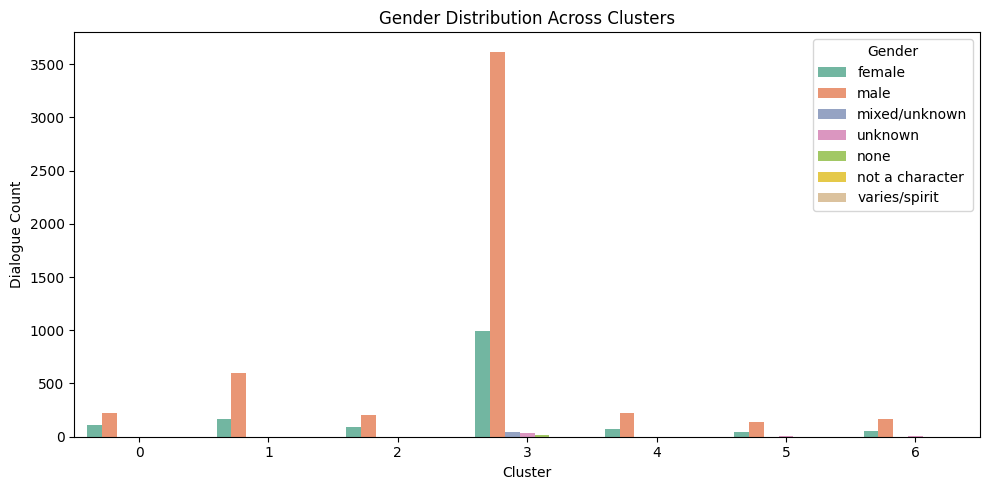

In [21]:
# === Step 13: Plot Gender Distribution Across Clusters ===
# Create a countplot to visually compare how male and female characters are distributed in each cluster.
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cluster', hue='gender', palette='Set2')
plt.title("Gender Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Dialogue Count")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

**This bar chart compares the count of dialogue lines by gender (male vs. female) within each cluster. The distribution reveals noticeable imbalances—some clusters (e.g., Cluster 5) are dominated by male speech, while others show a more balanced or female-leaning presence. This supports the hypothesis that certain dialogue types or themes (represented by clusters) are more commonly associated with one gender. For example, assertive or directive clusters often had a higher concentration of male dialogue.**

In [22]:
# === Step 14: Show Normalized Gender Proportion per Cluster ===
# Print percentage distribution of genders within each cluster for deeper insight into patterns.
print("\nNormalized Gender Proportion by Cluster:")
gender_dist = df.groupby('cluster')['gender'].value_counts(normalize=True).unstack().round(2)
print(gender_dist)


Normalized Gender Proportion by Cluster:
gender   female  male  mixed/unknown  none  not a character  unknown  \
cluster                                                                
0          0.33  0.66           0.00  0.01              NaN     0.01   
1          0.22  0.78           0.00  0.00              NaN     0.00   
2          0.29  0.70           0.01   NaN              NaN     0.00   
3          0.21  0.77           0.01  0.00              0.0     0.01   
4          0.25  0.74            NaN   NaN              NaN     0.01   
5          0.26  0.72           0.01   NaN              NaN     0.02   
6          0.24  0.74           0.01   NaN              NaN     0.01   

gender   varies/spirit  
cluster                 
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
5                  NaN  
6                  0.0  


**This table shows the proportion (as a percentage) of each gender category within every cluster. Unlike raw counts, this normalized view accounts for cluster size and emphasizes relative presence. For instance, Cluster 6 shows the highest female representation at 29%, while Cluster 5 has the lowest at just 19%. This perspective strengthens the interpretability of clustering results by revealing underlying gender associations, rather than just frequency patterns. These findings add weight to our gender-based analysis of language tone and narrative role**

# **Sentiment Analysis**

In [ ]:
# Vader
# The 'compound' score ranges from -1 (most negative) to +1 (most positive)
vader = SentimentIntensityAnalyzer()
combine_df["vader_sentiment"] = combine_df["preprocessed_text"].apply(lambda x : vader.polarity_scores(x)["compound"])

# TextBlob
# Polarity ranges from -1 (negative) to +1 (positive)
combine_df["textblob_sentiment"] = combine_df["preprocessed_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# BERT
bert_sentiment = pipeline("sentiment-analysis")
combine_df["bert_sentiment"] = combine_df["preprocessed_text"].apply(lambda x: bert_sentiment(x[:512])[0]["label"])


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


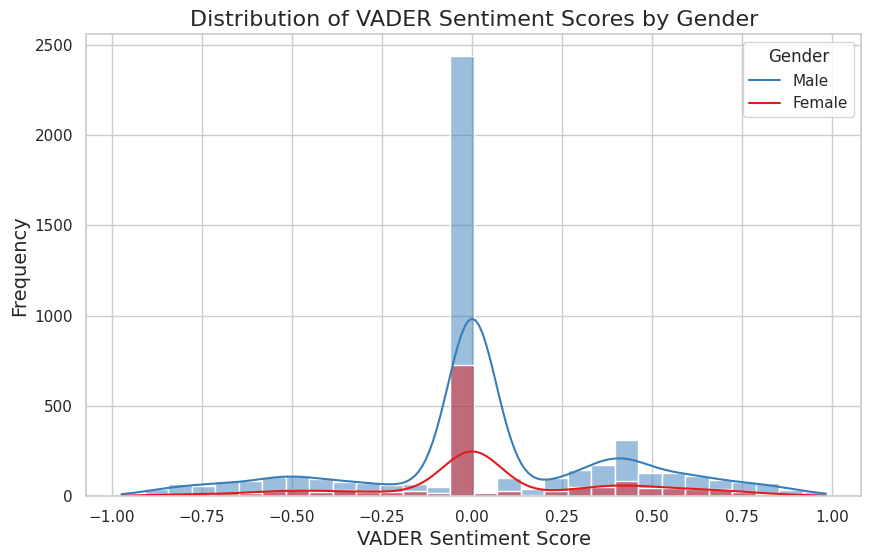

In [ ]:

# Filter the data to include only male and female genders
filtered_df = combine_df[combine_df['gender'].isin(['male', 'female'])]

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a histogram or density plot
sns.histplot(data=filtered_df, x='vader_sentiment', hue='gender', kde=True, palette='Set1', bins=30)

# Add labels and title
plt.title('Distribution of VADER Sentiment Scores by Gender', fontsize=16)
plt.xlabel('VADER Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Gender', labels = ["Male", "Female"])

# Show the plot
plt.show()


This graph shows the distribution of VADER sentiment scores by gender. It highlights that males tend to have more positive and negative sentiment scores. Ther is also a wide range of sentiments, from negative to positive, indicating diverse  emotions in the dataset

In [ ]:
filtered_df = combine_df[combine_df['gender'].isin(['male', 'female'])]
filtered_df['gender'].describe()

,gender
count,6495
unique,2
top,male
freq,4998


In [ ]:
print(filtered_df['gender'].unique())


['female' 'male']


In [ ]:
filtered_df['gender'].value_counts()

,count
gender,
male,4998
female,1497


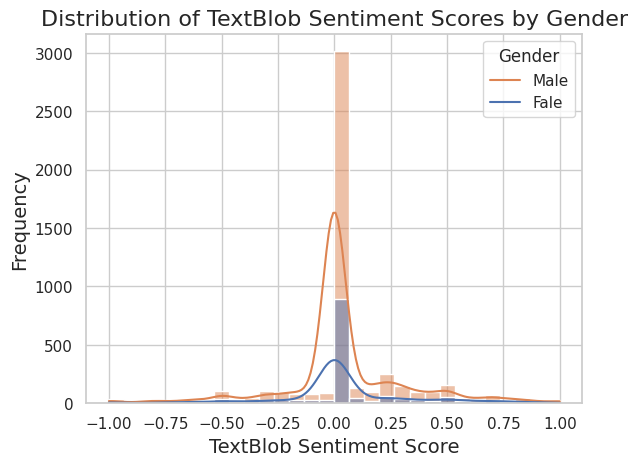

In [ ]:
# Create a density plot for TextBlob sentiment
sns.histplot(data=filtered_df, x='textblob_sentiment', hue='gender', kde=True , bins=30)

# labels and title
plt.title('Distribution of TextBlob Sentiment Scores by Gender', fontsize=16)
plt.xlabel('TextBlob Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.legend(title='Gender', labels=['Male', 'Fale'])

# Show the plot
plt.show()

The graph displays the sentiment scores of TextBlob by gender, showing that males tend to have more varied sentiment scores while females scores are more concentrated around neutral. Also, the average sentiment scores are near neutral with a tight distribution showing that most texts are emotionally balanced or slightly positive.

In [ ]:
print("\nBERT Sentiment Scores:")
print(combine_df['bert_sentiment'].describe())



BERT Sentiment Scores:
count         6612
unique           2
top       POSITIVE
freq          3472
Name: bert_sentiment, dtype: object


In [ ]:
bert_sentiment_analyzer = pipeline("sentiment-analysis")
# function to get the sentiment label from BERT
def get_sentiment_label(text):
    try:
        text = str(text)
        result = bert_sentiment_analyzer(text[:512])[0]  # Truncate to 512 characters
        return result['label']
    except Exception as e:
        print(f"Error during BERT sentiment analysis: {e}")
        return None

# Apply the function to create the 'bert_sentiment' column
combine_df["bert_sentiment"] = combine_df["preprocessed_text"].apply(get_sentiment_label)

# Convert BERT sentiment labels to numerical values
sentiment_map = {'NEGATIVE': -1, 'NEUTRAL': 0, 'POSITIVE': 1}

# Now convert the string labels to numbers
combine_df["bert_sentiment"] = combine_df["bert_sentiment"].map(sentiment_map).fillna(0)
print("\nBERT Sentiment Scores:")
print(combine_df['bert_sentiment'].describe())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu



BERT Sentiment Scores:
count    6612.000000
mean        0.050212
std         0.998814
min        -1.000000
25%        -1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: bert_sentiment, dtype: float64


Most texts are strongly polarized towards positive or negative sentiments, with fewer neutral texts

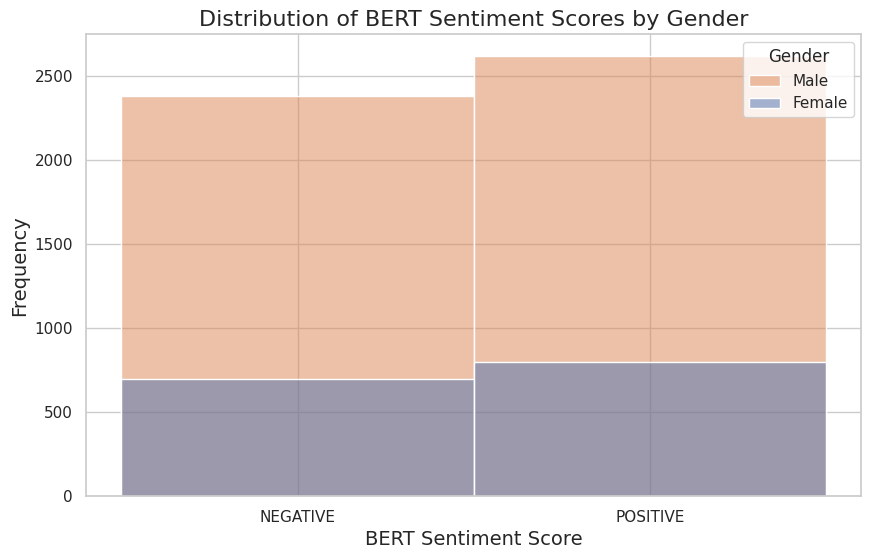

In [ ]:

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")


# Create a histogram or density plot for BERT sentiment
sns.histplot(data=filtered_df, x='bert_sentiment', hue='gender', kde=False, bins=30)

# Add labels and title
plt.title('Distribution of BERT Sentiment Scores by Gender', fontsize=16)
plt.xlabel('BERT Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Modify the legend to explicitly show which color is male and female
plt.legend(title='Gender', labels=['Male', 'Female'])

# Show the plot
plt.show()


Thebar chart shows the frequency of negative and positive sentiment scores for males and females. Both sentiment categories have more male  texts than female  texts. Therefore, having more positive texts means that a larger proportion of the analyzed dialogue expresses a positive sentiment

In [ ]:
# Create a summary DataFrame comparing the average of all gender sentiment scores
sentiment_comparison = combine_df[['vader_sentiment', 'textblob_sentiment', 'bert_sentiment']].describe()
print("\nSentiment Comparison:")
print(sentiment_comparison)


Sentiment Comparison:
       vader_sentiment  textblob_sentiment  bert_sentiment
count      6612.000000         6612.000000     6612.000000
mean          0.051393            0.041841        0.050212
std           0.363078            0.278947        0.998814
min          -0.976900           -1.000000       -1.000000
25%           0.000000            0.000000       -1.000000
50%           0.000000            0.000000        1.000000
75%           0.296000            0.050000        1.000000
max           0.982100            1.000000        1.000000


VADER and TextBlob scores are centered around zero, indicating a balanced mix of positive and negative sentiments, with some neutral comments.
BERT scores are predominantly polarized, with most values at -1 or 1, showing a tendency to classify texts as strongly negative or positive but very few neutral

In [ ]:
movie_sentiment = combine_df.groupby('movie')[['vader_sentiment', 'textblob_sentiment', 'bert_sentiment']].mean()
print("\nSentiment Trends by Movie:")
print(movie_sentiment)



Sentiment Trends by Movie:
                                             vader_sentiment  \
movie                                                          
Harry Potter and the Chamber of Secrets             0.034195   
Harry Potter and the Deathly Hallows Part 1         0.037536   
Harry Potter and the Deathly Hallows Part 2         0.016121   
Harry Potter and the Goblet of Fire                 0.069502   
Harry Potter and the Half-Blood Prince              0.094102   
Harry Potter and the Order of the Phoenix           0.030330   
Harry Potter and the Philosopher's Stone            0.065916   
Harry Potter and the Prisoner of Azkaban            0.056539   

                                             textblob_sentiment  \
movie                                                             
Harry Potter and the Chamber of Secrets                0.031462   
Harry Potter and the Deathly Hallows Part 1            0.043685   
Harry Potter and the Deathly Hallows Part 2            0.036174

VADER and TextBlob scores are mostly positive but modest, indicating slightly favorable sentiments across movies. BERT scores vary more, with some movies like "Deathly Hallows Part 2" and "Goblet of Fire" showing higher positive values, while "Chamber of Secrets" has a slightly negative score.positive across the movies, with BERT highlighting some movies more strongly associated with positive sentiments.



<Figure size 10000x10000 with 0 Axes>

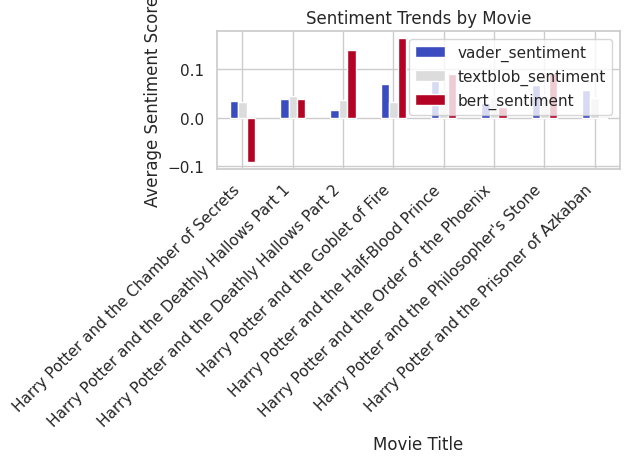

In [ ]:
plt.figure(figsize=(100, 100))
movie_sentiment.plot(kind='bar', colormap='coolwarm')
plt.title('Sentiment Trends by Movie')
plt.xlabel('Movie Title')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The visualization highlights differences in sentiment across movies and analysis methods, revealing which movies conveyed more positive or negative sentiment in the reviews or dialogues analyzed.

Top 20 Characters by Number of Occurrences:
['harry potter', 'ron weasley', 'hermione granger', 'albus dumbledore', 'rubeus hagrid', 'severus snape', 'minerva mcgonagall', 'horace slughorn', 'voldemort', 'remus lupin', 'draco malfoy', 'neville longbottom', 'alastor moody', 'dolores umbridge', 'fred weasley', 'arthur weasley', 'sirius black', 'cornelius fudge', 'george weasley', 'vernon dursley']

Sentiment Trends by Character (Top 20):
                    vader_sentiment  textblob_sentiment  bert_sentiment
character                                                              
horace slughorn            0.169848            0.093769       -0.016129
minerva mcgonagall         0.140862            0.094452        0.072000
albus dumbledore           0.130372            0.079163        0.133787
remus lupin                0.125552            0.075368        0.092593
severus snape              0.098911            0.044209        0.037975
fred weasley               0.080322            0.118599 

<Figure size 1200x600 with 0 Axes>

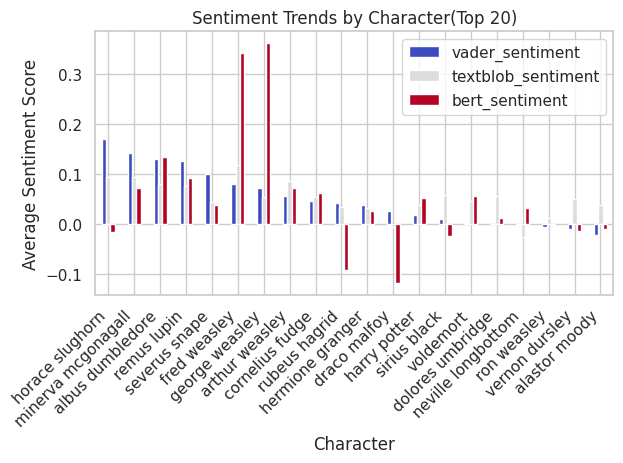

In [ ]:
# Identify top 20 most frequent characters

character_counts = combine_df['character'].value_counts()
top_20_characters = character_counts.head(20).index.tolist() # get the index as a list

# Filter the DataFrame to include only the top 20 characters
top_characters_df = combine_df[combine_df['character'].isin(top_20_characters)]

# Print the information
print("Top 20 Characters by Number of Occurrences:")
print(top_20_characters)
# Calculate sentiment trends by character for the selected top characters
character_sentiment = top_characters_df.groupby('character')[['vader_sentiment', 'textblob_sentiment', 'bert_sentiment']].mean()

print("\nSentiment Trends by Character (Top 20):")
print(character_sentiment.sort_values(by='vader_sentiment', ascending = False).head(20))

# Plot the character sentiment.
plt.figure(figsize=(12, 6))
character_sentiment.sort_values(by='vader_sentiment', ascending = False).head(20).plot(kind='bar', colormap='coolwarm')
plt.title('Sentiment Trends by Character(Top 20)')
plt.xlabel('Character')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The bar chart compares the average sentiment scores of the top 20 most frequent characters, calculated using three sentiment analysis models: Vader, TextBlob, and BERT. While Vader and TextBlob generally assign positive scores to most characters, BERT shows more extreme positive scores for Fred and George Weasley and more negative scores for Draco Malfoy and Rubeus Hagrid

In [ ]:
# 2. Define Assertiveness: High positive/negative sentiment = assertive
combine_df["assertive"] = combine_df["vader_sentiment"].apply(lambda x: abs(x) > 0.5)

# 3. Calculate Average Assertiveness by Gender
assertiveness_by_gender = combine_df.groupby("gender")["assertive"].mean().sort_values(ascending=False)
print("Average Assertiveness by Gender:")
print(assertiveness_by_gender)

Average Assertiveness by Gender:
gender
varies/spirit      1.000000
unknown            0.276596
male               0.209284
female             0.197729
mixed/unknown      0.192308
none               0.125000
not a character    0.000000
Name: assertive, dtype: float64


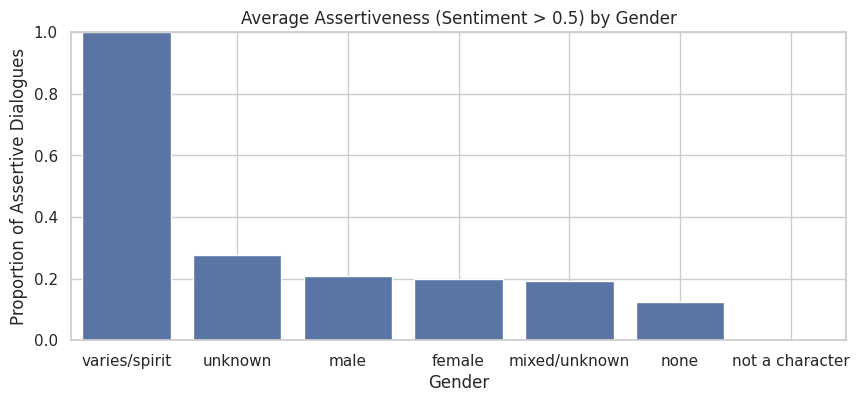

In [ ]:
# Bar plot of average assertiveness
plt.figure(figsize=(10, 4))
sns.barplot(x=assertiveness_by_gender.index, y=assertiveness_by_gender.values)
plt.title("Average Assertiveness (Sentiment > 0.5) by Gender")
plt.ylabel("Proportion of Assertive Dialogues")
plt.xlabel("Gender")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

The bar chart and accompanying data table show the average assertiveness by gender, with assertiveness defined as a sentiment score with an absolute value greater than 0.5. The results indicate that the "varies/spirit" category is the most assertive with a score of 1.0, followed by "unknown" at 0.28, and "male" and "female" at approximately 0.21 and 0.20, respectively. The "not a character" category is the least assertive, with a score of 0.0

# **Topic Modeling**

All following code was initially generated using ChatGPT and then modified and tested for our dataset.

In [7]:
# 1.
"""
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
"""
# 2.
# Download required NLTK data (no punkt to avoid issues)
nltk.download('stopwords', quiet=True)
# Use TreebankWordTokenizer instead of word_tokenize
tokenizer = TreebankWordTokenizer()
# Define stop words
stop_words = set(stopwords.words('english'))

# 3.
# Clean the text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Step 2: Tokenize and remove stopwords
def tokenize(text):
    tokens = tokenizer.tokenize(text)
    return [word for word in tokens if word not in stop_words and len(word) > 2]

# 4.
file_path = '/content/drive/MyDrive/datasets/Harry Potter Movies Dataset_merged_data.csv'
df2 = pd.read_csv(file_path, low_memory=False)


# 5.
raw_text_column = 'dialog'  # update if needed
df2['clean_text'] = df2[raw_text_column].fillna('').apply(clean_text)
df2['tokens'] = df2['clean_text'].apply(tokenize)
df2.head()

,Unnamed: 0,movie,chapter,character,dialog,gender,releaseYear,clean_text,tokens
0,0,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Narcissa!,female,2009,narcissa,[narcissa]
1,1,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Cissy! You mustn't do this. He can't be trusted.,female,2009,cissy you mustnt do this he cant be trusted,"[cissy, mustnt, cant, trusted]"
2,2,Harry Potter and the Half-Blood Prince,Snape's Visitors,narcissa malfoy,The Dark Lord trusts him.,female,2009,the dark lord trusts him,"[dark, lord, trusts]"
3,3,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,The Dark Lord is mistaken.,female,2009,the dark lord is mistaken,"[dark, lord, mistaken]"
4,4,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Or so I believe.,female,2009,or so i believe,[believe]


in the above cell:
	1.	import the necessary libraries
	2.	download and initialize the stopwords from nltk
	3.	define two text cleaning functions, one to convert all dialog to lowercase, and another to create the tokens column
	4.	apply the dialog column to the clean_text() function, then apply the clean_text column to the tokenize() function

# **Topic Modeling - LDA**

In [8]:
# 1.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 2. Vectorize the cleaned text
vectorizer = CountVectorizer(
    stop_words='english',     # extra filtering
    max_df=0.95,              # ignore words in >95% of scenes
    min_df=5                  # ignore rare words (<5 scenes)
)
X = vectorizer.fit_transform(df2['clean_text'])  # document-term matrix

# 3.  Train the LDA model
n_topics = 5  # adjust based on BERTopic or your evaluation plan
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=10,
    learning_method='batch',
    random_state=42
)
lda_model.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In the above cell:
1. Import the necessary libraries.
2. Initialize the CountVectorizer() function and apply it to the clean_text column to create Vectorize(Bag of Words).
3. Set the number of topics to 5, then train the model.

In [9]:
lda_topics = []
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic_weights in enumerate(lda_model.components_):
    top_indices = topic_weights.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_indices]
    print(f"Topic {topic_idx}:\n{', '.join(top_words)}\n")
    lda_topics.append(top_words)

Topic 0:
come, dumbledore, hagrid, thats, didnt, thought, let, voldemort, told, kill

Topic 1:
dont, did, know, like, just, harry, say, want, sorry, time

Topic 2:
harry, think, sir, good, dont, potter, ron, dobby, just, youre

Topic 3:
right, got, hermione, whats, yeah, theres, mr, doing, potter, stop

Topic 4:
oh, yes, im, professor, hes, thats, snape, need, going, ask



In the above cell:
show the top10 words for each topic


In [10]:
# Get the topic distribution for each scene (document)
topic_distributions = lda_model.transform(X)  # shape: (num_scenes, num_topics)

# Assign each scene the topic with the highest probability
df2['lda_topic'] = topic_distributions.argmax(axis=1)
df2

,Unnamed: 0,movie,chapter,character,dialog,gender,releaseYear,clean_text,tokens,lda_topic
0,0,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Narcissa!,female,2009,narcissa,[narcissa],0
1,1,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Cissy! You mustn't do this. He can't be trusted.,female,2009,cissy you mustnt do this he cant be trusted,"[cissy, mustnt, cant, trusted]",4
2,2,Harry Potter and the Half-Blood Prince,Snape's Visitors,narcissa malfoy,The Dark Lord trusts him.,female,2009,the dark lord trusts him,"[dark, lord, trusts]",0
3,3,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,The Dark Lord is mistaken.,female,2009,the dark lord is mistaken,"[dark, lord, mistaken]",0
4,4,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Or so I believe.,female,2009,or so i believe,[believe],1
...,...,...,...,...,...,...,...,...,...,...
7440,7440,Harry Potter and the Deathly Hallows Part 2,Nineteen Years Later,harry potter,Then Slytherin House will have gained a wonder...,male,2011,then slytherin house will have gained a wonder...,"[slytherin, house, gained, wonderful, wizard, ...",3
7441,7441,Harry Potter and the Deathly Hallows Part 2,Nineteen Years Later,albus potter,Really?,male,2011,really,[really],2
7442,7442,Harry Potter and the Deathly Hallows Part 2,Nineteen Years Later,harry potter,Really.,male,2011,really,[really],2
7443,7443,Harry Potter and the Deathly Hallows Part 2,Nineteen Years Later,harry potter,Ready?,male,2011,ready,[ready],1


In the above cell:
Create a new column to store the topic assigned to each dialog

In [11]:
# 1.
topic_counts = df2.groupby(['movie', 'lda_topic']).size().reset_index(name='count')
print(topic_counts)

# 2.
dominant_topics = topic_counts.loc[topic_counts.groupby('movie')['count'].idxmax()]
print(dominant_topics)

                                          movie  lda_topic  count
0       Harry Potter and the Chamber of Secrets          0    246
1       Harry Potter and the Chamber of Secrets          1    211
2       Harry Potter and the Chamber of Secrets          2    229
3       Harry Potter and the Chamber of Secrets          3    157
4       Harry Potter and the Chamber of Secrets          4    144
5   Harry Potter and the Deathly Hallows Part 1          0    281
6   Harry Potter and the Deathly Hallows Part 1          1    192
7   Harry Potter and the Deathly Hallows Part 1          2    234
8   Harry Potter and the Deathly Hallows Part 1          3    177
9   Harry Potter and the Deathly Hallows Part 1          4    128
10  Harry Potter and the Deathly Hallows Part 2          0    200
11  Harry Potter and the Deathly Hallows Part 2          1    161
12  Harry Potter and the Deathly Hallows Part 2          2    136
13  Harry Potter and the Deathly Hallows Part 2          3     93
14  Harry 

In the above cell:
1.   show how many times each topic appears in each movie
2. show the most common topics for each movie

# **Topic Modeling - NMF**

In [12]:
# 1.
from sklearn.feature_extraction.text import TfidfVectorizer

# 2. Vectorize using TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.95,
    min_df=5
)

# 3.
X_tfidf = tfidf_vectorizer.fit_transform(df2['clean_text'])

In the above cell:
1. Import the necessary libraries.
2. Initialize the TfidfVectorizer() function
3. apply TfidfVectorizer to the clean_text column to create Vectorize(TF-IDF)

In [13]:
from sklearn.decomposition import NMF

n_topics = 5

nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(X_tfidf)

NMF(n_components=5, random_state=42)

In the above cell:
1. Import the necessary libraries.
2. Set the number of topic to 5.
3. train the NMF

In [14]:
feature_names = tfidf_vectorizer.get_feature_names_out()

nmf_topics = []
def print_nmf_topics(model, feature_names, top_n=10):
    for topic_idx, topic_weights in enumerate(model.components_):
        top_indices = topic_weights.argsort()[:-top_n - 1:-1]
        top_words = [feature_names[i] for i in top_indices]
        print(f"\nTopic {topic_idx}: {', '.join(top_words)}")
        nmf_topics.append(top_words)

print_nmf_topics(nmf_model, feature_names)


Topic 0: harry, potter, hello, good, time, dobby, did, youre, look, wand

Topic 1: dont, know, think, like, just, sir, did, youre, want, didnt

Topic 2: yes, sir, professor, ah, oh, say, theyre, lord, dumbledore, exactly

Topic 3: come, did, potter, hurry, way, hagrid, lets, ron, hermione, dobby

Topic 4: right, oh, im, yeah, thats, ron, youre, sorry, hes, just


In the above cell:
show the top10 words for each topic

In [15]:
# Get topic distribution per scene
nmf_topic_distributions = nmf_model.transform(X_tfidf)

# Assign topic with highest weight
df2['nmf_topic'] = nmf_topic_distributions.argmax(axis=1)

df2

,Unnamed: 0,movie,chapter,character,dialog,gender,releaseYear,clean_text,tokens,lda_topic,nmf_topic
0,0,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Narcissa!,female,2009,narcissa,[narcissa],0,0
1,1,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Cissy! You mustn't do this. He can't be trusted.,female,2009,cissy you mustnt do this he cant be trusted,"[cissy, mustnt, cant, trusted]",4,4
2,2,Harry Potter and the Half-Blood Prince,Snape's Visitors,narcissa malfoy,The Dark Lord trusts him.,female,2009,the dark lord trusts him,"[dark, lord, trusts]",0,2
3,3,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,The Dark Lord is mistaken.,female,2009,the dark lord is mistaken,"[dark, lord, mistaken]",0,2
4,4,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Or so I believe.,female,2009,or so i believe,[believe],1,1
...,...,...,...,...,...,...,...,...,...,...,...
7440,7440,Harry Potter and the Deathly Hallows Part 2,Nineteen Years Later,harry potter,Then Slytherin House will have gained a wonder...,male,2011,then slytherin house will have gained a wonder...,"[slytherin, house, gained, wonderful, wizard, ...",3,4
7441,7441,Harry Potter and the Deathly Hallows Part 2,Nineteen Years Later,albus potter,Really?,male,2011,really,[really],2,1
7442,7442,Harry Potter and the Deathly Hallows Part 2,Nineteen Years Later,harry potter,Really.,male,2011,really,[really],2,1
7443,7443,Harry Potter and the Deathly Hallows Part 2,Nineteen Years Later,harry potter,Ready?,male,2011,ready,[ready],1,4


In the above cell:
Create a new column to store the topic assigned to each dialog

In [16]:
# 1.
nmf_topic_counts = df2.groupby(['movie', 'nmf_topic']).size().reset_index(name='count')
nmf_topic_counts

# 2.
nmf_dominant_topics = nmf_topic_counts.loc[nmf_topic_counts.groupby('movie')['count'].idxmax()]
nmf_dominant_topics

,movie,nmf_topic,count
4,Harry Potter and the Chamber of Secrets,4,402
9,Harry Potter and the Deathly Hallows Part 1,4,409
14,Harry Potter and the Deathly Hallows Part 2,4,283
19,Harry Potter and the Goblet of Fire,4,307
24,Harry Potter and the Half-Blood Prince,4,406
29,Harry Potter and the Order of the Phoenix,4,455
34,Harry Potter and the Philosopher's Stone,4,403
39,Harry Potter and the Prisoner of Azkaban,4,356


In the above cell:
1.   show how many times each topic appears in each movie
2. show the most common topics for each movie

# **Topic Modeling - BERTopic**

In [4]:
!pip install bertopic


In [18]:
# 1.
from bertopic import BERTopic
# 2.
docs_raw = df2['dialog'].fillna('').astype(str).tolist()
topic_model_raw = BERTopic(nr_topics=6)
topics_raw, probs_raw = topic_model_raw.fit_transform(docs_raw)

In the above cell:
1. import the necessary libraries
2. apply the bertopic model on the dialog column which contains raw dialog, so align the data type and handle missing values, then set the number of topics to 6

In [19]:
bertopic_topics_raw = []
# Extract top words per topic
for topic_num in topic_model_raw.get_topic_info()['Topic']:
    top_words = [word for word, _ in topic_model_raw.get_topic(topic_num)[:10]]
    print(f"[Raw] Topic {topic_num}:\n{', '.join(top_words)}\n")
    if topic_num != -1 or topic_num != 0 or topic_num != 1:
        bertopic_topics_raw.append(top_words) ##############################################


[Raw] Topic -1:
you, to, the, it, and, me, of, in, that, is

[Raw] Topic 0:
the, you, to, of, harry, it, and, in, is, that

[Raw] Topic 1:
you, what, it, the, to, no, that, he, me, on

[Raw] Topic 2:
lumos, expecto, expelliarmus, patronum, stupify, avada, alohomora, maxima, riddikulus, kedavra

[Raw] Topic 3:
myrtle, moaning, gilliweed, herbology, plants, me, the, know, turnip, in

[Raw] Topic 4:
buckbeak, come, on, whoa, okay, quickly, buckbeaks, no, hurry, to



in the above cell:
show the top 10 words for each topic and add the topic names to a list, excluding the outlier (-1) and topics with too many stop words (0, 1), for use in a coherence test later

In [20]:
df2['bertopic_topic'] = topics_raw
df2.head()

,Unnamed: 0,movie,chapter,character,dialog,gender,releaseYear,clean_text,tokens,lda_topic,nmf_topic,bertopic_topic
0,0,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Narcissa!,female,2009,narcissa,[narcissa],0,0,-1
1,1,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Cissy! You mustn't do this. He can't be trusted.,female,2009,cissy you mustnt do this he cant be trusted,"[cissy, mustnt, cant, trusted]",4,4,1
2,2,Harry Potter and the Half-Blood Prince,Snape's Visitors,narcissa malfoy,The Dark Lord trusts him.,female,2009,the dark lord trusts him,"[dark, lord, trusts]",0,2,0
3,3,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,The Dark Lord is mistaken.,female,2009,the dark lord is mistaken,"[dark, lord, mistaken]",0,2,0
4,4,Harry Potter and the Half-Blood Prince,Snape's Visitors,bellatrix lestrange,Or so I believe.,female,2009,or so i believe,[believe],1,1,1


In the above cell:
Create a new column to store the topic assigned to each dialog

In [21]:
# 1. Count topics per movie (raw)
bertopic_counts = df2.groupby(['movie', 'bertopic_topic']).size().reset_index(name='count')
display(bertopic_counts)

# 2. Raw BERTopic
filtered_counts = bertopic_counts[
    ~bertopic_counts['bertopic_topic'].isin([-1, 0, 1])
    ]
bertopic_dominant = filtered_counts.loc[
    filtered_counts.groupby('movie')['count'].idxmax()
]
display(bertopic_dominant)

,movie,bertopic_topic,count
0,Harry Potter and the Chamber of Secrets,-1,240
1,Harry Potter and the Chamber of Secrets,0,383
2,Harry Potter and the Chamber of Secrets,1,342
3,Harry Potter and the Chamber of Secrets,2,12
4,Harry Potter and the Chamber of Secrets,3,10
5,Harry Potter and the Deathly Hallows Part 1,-1,294
6,Harry Potter and the Deathly Hallows Part 1,0,376
7,Harry Potter and the Deathly Hallows Part 1,1,319
8,Harry Potter and the Deathly Hallows Part 1,2,22
9,Harry Potter and the Deathly Hallows Part 1,3,1


,movie,bertopic_topic,count
3,Harry Potter and the Chamber of Secrets,2,12
8,Harry Potter and the Deathly Hallows Part 1,2,22
13,Harry Potter and the Deathly Hallows Part 2,2,12
18,Harry Potter and the Goblet of Fire,3,10
22,Harry Potter and the Half-Blood Prince,2,8
27,Harry Potter and the Order of the Phoenix,2,35
32,Harry Potter and the Philosopher's Stone,2,5
37,Harry Potter and the Prisoner of Azkaban,2,16



In the above cell:
1.   show how many times each topic appears in each movie
2. show the most common topics for each movie

## **Topic Modeling - Coherence Score**

In [22]:
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatibl

In [22]:
# 1.
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess

# 2. Tokenized texts from clean_text
texts = df2['tokens'].tolist()  # Already preprocessed
dictionary = Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.95)


# 3. Tokenized texts from raw dialog
texts_raw = df2['dialog'].fillna('').apply(simple_preprocess).tolist()
dictionary_raw = Dictionary(texts_raw)
dictionary_raw.filter_extremes(no_below=5, no_above=0.95)

in the above cell:
1. import the necessary libraries
2. use the tokenized dialog to create a dictionary
3.	use the raw dialog to create another dictionary

In [24]:
# 1. LDA
coherence_lda = CoherenceModel(
    topics=lda_topics, texts=texts, dictionary=dictionary, coherence='c_v'
)
lda_score = coherence_lda.get_coherence()

# 2. NMF
coherence_nmf = CoherenceModel(
    topics=nmf_topics, texts=texts, dictionary=dictionary, coherence='c_v'
)
nmf_score = coherence_nmf.get_coherence()

# 3. BERTopic
coherence_bertopic_raw = CoherenceModel(
    topics=bertopic_topics_raw,
    texts=texts_raw,
    dictionary=dictionary_raw,
    coherence='c_v'
)
bertopic_score_raw = coherence_bertopic_raw.get_coherence()

# 4 .
print("Coherence Scores:")
print(f"  LDA:       {lda_score:.4f}")
print(f"  NMF:       {nmf_score:.4f}")
print(f"  BERTopic:  {bertopic_score_raw:.4f}")

Coherence Scores:
  LDA:       0.3649
  NMF:       0.4064
  BERTopic:  0.5892


in the above cell:
1. apply coherence to LDA
2. apply coherence to NML
3. apply coherence to Bertopic
4. show the coherence score

## **Topic Modeling - Visualization**

In [25]:
# 1.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 2.
def plot_topic_wordcloud(title, word_weights):
    wc = WordCloud(width=800, height=400, background_color='white')
    wc.generate_from_frequencies(dict(word_weights))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()

in the above cell:
1. import the necessary libraries
2. define the word cloud style, including image width, image height, background color, axis, title, font size, and display size

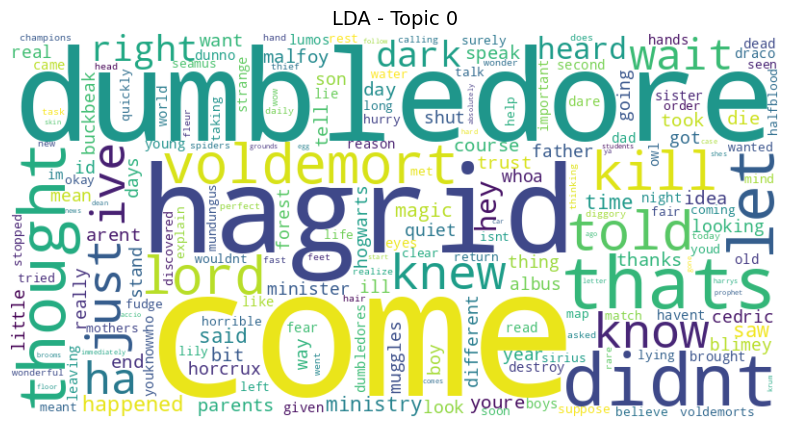

In [26]:
# 1.
feature_names = vectorizer.get_feature_names_out()
# 2.
topic_id = 0
topic = lda_model.components_[topic_id]
# 3.
all_words = [(feature_names[i], topic[i]) for i in range(len(topic))]
plot_topic_wordcloud("LDA - Topic 0", all_words)

in the above cell:
1. gets the vocabulary words from CountVectorizer
2. select topic to present in cloud word
3. find all words in selected topic and the frequency then apply to plot_topic_wordcloud() function


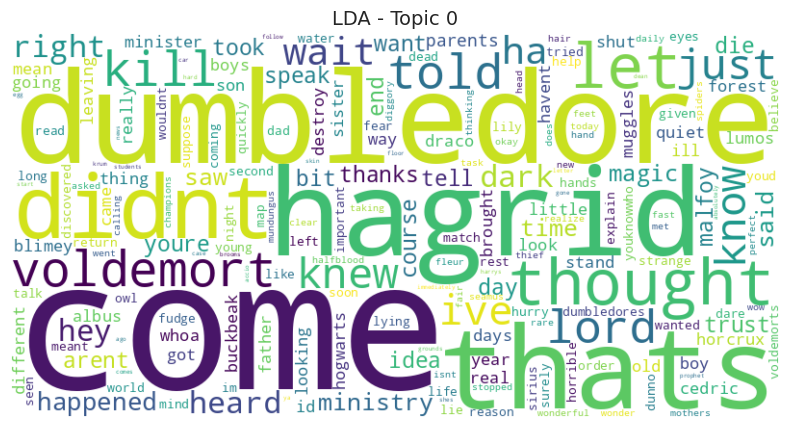

in the above cell:
show all words and their frequencies in topic 0 in LDA, larger words indicate a higher appearance rate in this topic

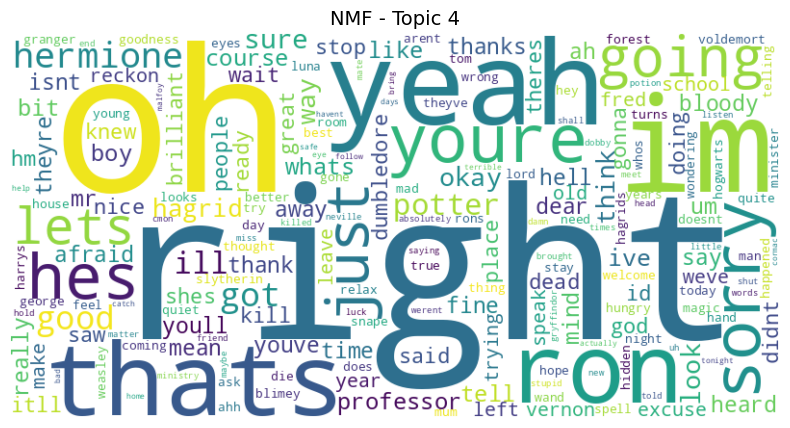

In [27]:
# 1.
feature_names = tfidf_vectorizer.get_feature_names_out()
# 2.
topic_id = 4
topic = nmf_model.components_[topic_id]
# 3.
all_words = [(feature_names[i], topic[i]) for i in range(len(topic))]
plot_topic_wordcloud("NMF - Topic 4", all_words)

in the above cell:
1. gets the vocabulary words from TF-IDF
2. select topic to present in cloud word
3. find all words in selected topic and the frequency then apply to plot_topic_wordcloud() function


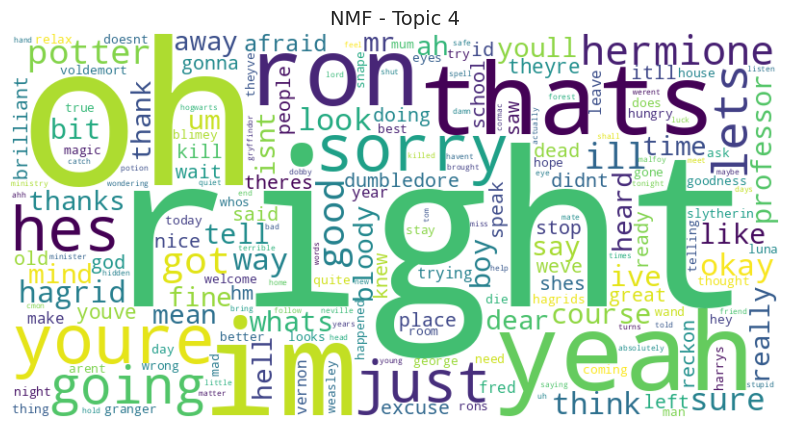

in the above cell:
show all words and their frequencies in topic 0 in NMF, larger words indicate a higher appearance rate in this topic

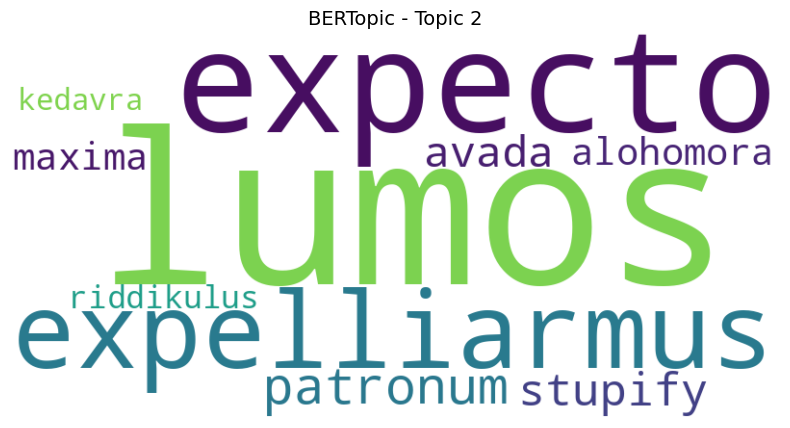

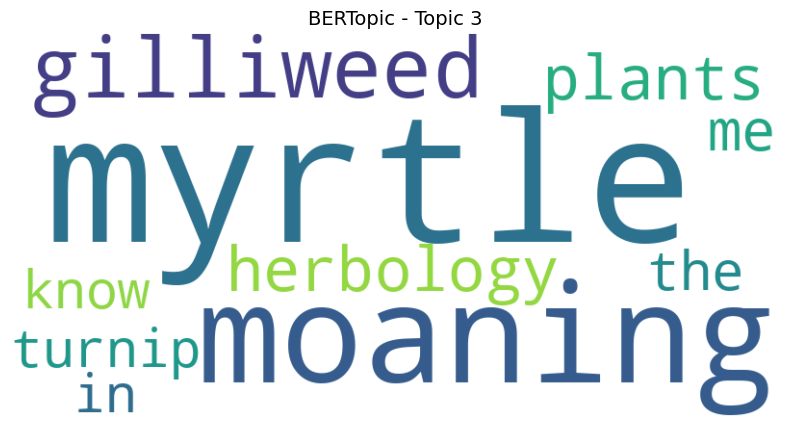

In [28]:
for topic_id in [2, 3]:
    topic_words = topic_model_raw.get_topic(topic_id)  # returns list of (word, score)
    plot_topic_wordcloud(f"BERTopic - Topic {topic_id}", topic_words)  # uses all by default

in the above cell:

for the bertopic model, use the built-in function to get the vocabulary for each topic, then loop through specific topics and apply the plot_topic_wordcloud() function separately

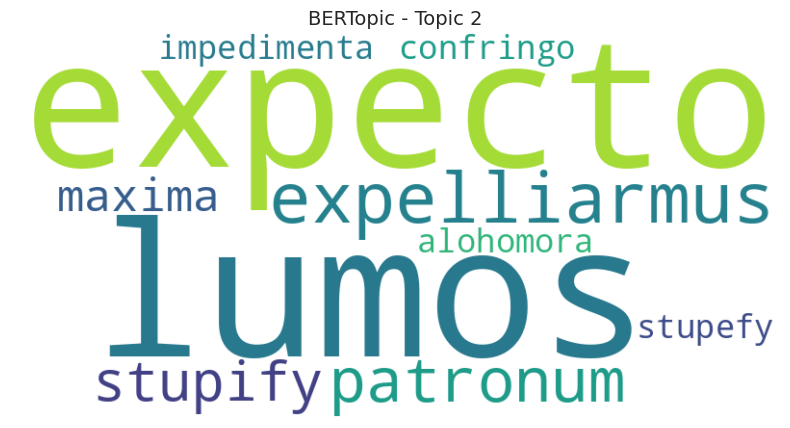

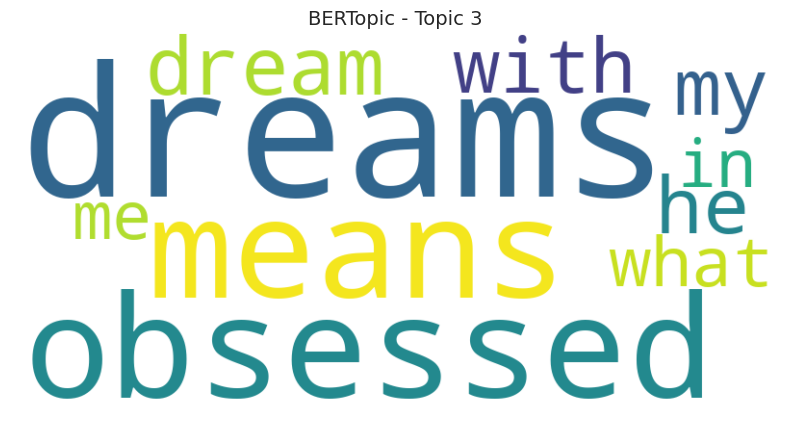

in above cell:

show all words and their frequencies in topics 2 and 3 in bertopic. since there isnt a dominant topic across all movies, movies 1, 3, 2, 3, 6, and 7 are assigned to topic 2, while movies 4, 5, and 8 are assigned to topic 3. present the word clouds for each topic, where larger words indicate a higher appearance rate within that topic

In [1]:
jupyter nbconvert --to html "/Users/hugo/Desktop/GBA 6410 project"

SyntaxError: invalid syntax (2395981630.py, line 1)